<a href="https://colab.research.google.com/github/raghav2069/Stock-market-prediction-using-CNN/blob/main/PCA_%2B_Outlier_Removal_%2B_XGBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
url='https://raw.githubusercontent.com/codebasics/py/master/ML/18_PCA/Exercise/heart.csv'
df= pd.read_csv(url)
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.shape

(918, 12)

In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
np.unique(df.ChestPainType)

array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object)

In [ ]:
dummies=pd.get_dummies(df[['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']], drop_first=True)
dummies.head(5)

,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,1,1,0,0,1,0,0,0,1
1,0,0,1,0,1,0,0,1,0
2,1,1,0,0,0,1,0,0,1
3,0,0,0,0,1,0,1,1,0
4,1,0,1,0,1,0,0,0,1


In [ ]:
#Outlier Removal with Z-Score

from scipy.stats import zscore
dfz=pd.DataFrame(zscore(df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']]), columns=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak'])
df_processed=dfz[(dfz>-3) & (dfz<3)]

In [ ]:
df_processed.isna().values.any()

True

In [ ]:
df_processed.loc[850]

Age            0.900464
RestingBP      1.491752
Cholesterol   -0.318314
FastingBS     -0.551341
MaxHR          0.321877
Oldpeak             NaN
Name: 850, dtype: float64

In [ ]:
df_processed=pd.concat([df_processed,dummies,df['HeartDisease']], axis='columns')
df_processed.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up,HeartDisease
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432,1,1,0,0,1,0,0,0,1,0
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664,0,0,1,0,1,0,0,1,0,1
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432,1,1,0,0,0,1,0,0,1,0
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711,0,0,0,0,1,0,1,1,0,1
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432,1,0,1,0,1,0,0,0,1,0


In [ ]:
df_processed=df_processed.dropna()
df_processed.shape

(899, 16)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_processed.drop('HeartDisease', axis='columns'), df_processed['HeartDisease'], test_size=0.2, random_state=10)

In [ ]:
from sklearn.svm import SVC
model_svm=SVC().fit(X_train, y_train)
model_svm.score(X_test, y_test)

0.8388888888888889

In [ ]:
import xgboost as xgb
model=xgb.XGBClassifier().fit(X_train, y_train)
model.score(X_test, y_test)

0.8444444444444444

Thus let's use XGBoost

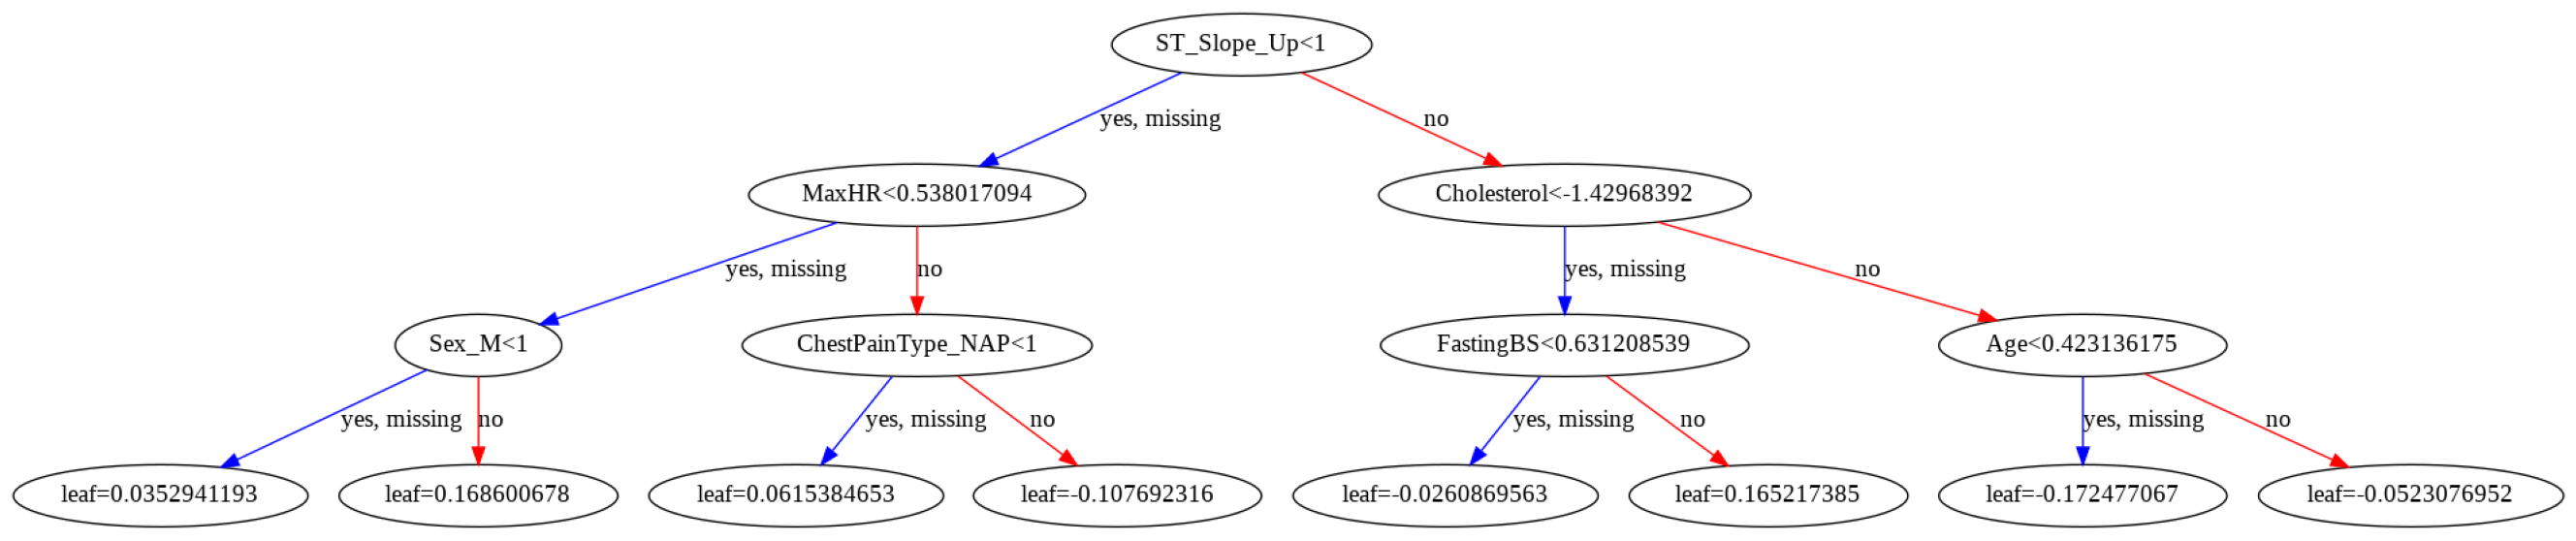

In [ ]:
xgb.plot_tree(model)
plt.show()

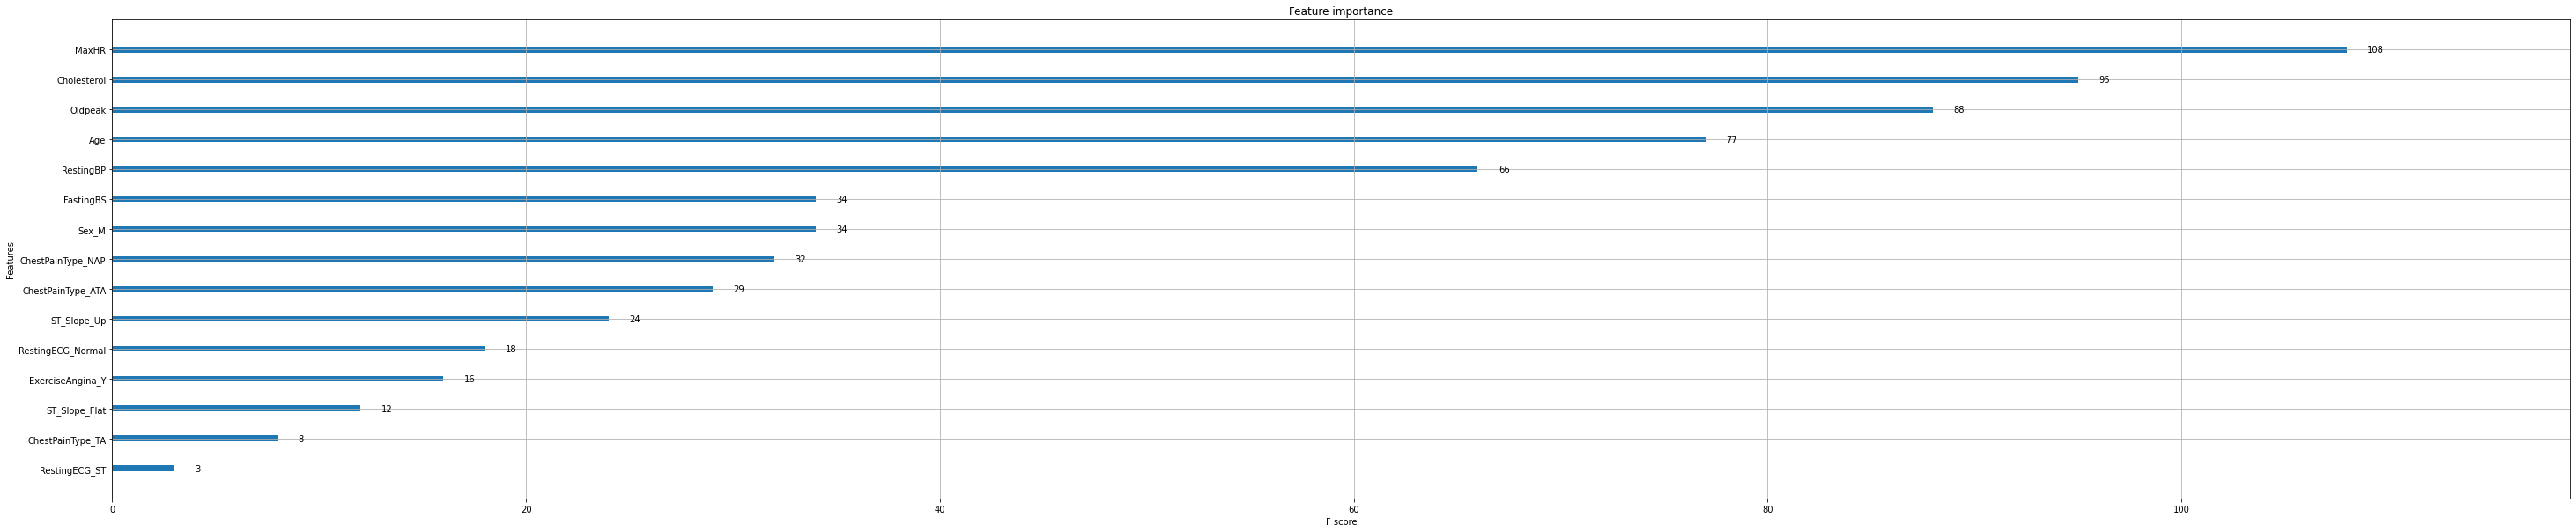

In [ ]:
xgb.plot_importance(model)

In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
df_processed_pca=pd.DataFrame(pca.fit_transform(df_processed.drop('HeartDisease', axis='columns')))
df_processed_pca.shape

(899, 10)

In [ ]:
pca.n_components_

10

In [ ]:
pca.explained_variance_ratio_

array([0.27043665, 0.16402609, 0.11858022, 0.10690069, 0.08277014,
       0.07706207, 0.04112557, 0.04045056, 0.02699604, 0.0227456 ])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_processed_pca, df_processed['HeartDisease'], test_size=0.2, random_state=10)

In [ ]:
from xgboost import XGBClassifier
model_pca=XGBClassifier().fit(X_train, y_train)
model_pca.score(X_test, y_test)

0.8277777777777777